In [ ]:
# AIG150 Winter 2024
# Week 3 Sample Code 
# Asma M Paracha
# EDA

In [3]:
# load the dataset from sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
iris_nparray = iris.data
# After data is loaded into a variable we can convert it to a numpy array or pandas dataframe
print(iris_nparray)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
# convert into a dataframe
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype="category")

In [5]:
# get the mean of numeric columns
print(iris_dataframe.mean(numeric_only=True))

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [6]:
# Get the median 
print(iris_dataframe.median(numeric_only=True))

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


In [7]:
# You can get most of the statistics by using describe
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# check the data for skewness
from scipy.stats import skew, skewtest
variable = iris_dataframe['petal length (cm)']
s = skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f'% (s, zscore, pvalue))

Skewness -0.272 z-score -1.400 p-value 0.162


In [9]:
# check the data for kurtosis
from scipy.stats import kurtosis, kurtosistest
variable = iris_dataframe['petal length (cm)']
k = kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -1.396 z-score -14.823 p-value 0.000


In [10]:
# Count For Categorial Data
pcts = [0, .25, .5, .75, 1]
iris_binned = pd.concat(
    [pd.qcut(iris_dataframe.iloc[:,0], pcts, precision=1),
    pd.qcut(iris_dataframe.iloc[:,1], pcts, precision=1),
    pd.qcut(iris_dataframe.iloc[:,2], pcts, precision=1),
    pd.qcut(iris_dataframe.iloc[:,3], pcts, precision=1)],
    join='outer', axis = 1)

In [11]:
print(iris_binned)

    sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0          (4.2, 5.1]       (3.3, 4.4]        (0.9, 1.6]       (0.0, 0.3]
1          (4.2, 5.1]       (2.8, 3.0]        (0.9, 1.6]       (0.0, 0.3]
2          (4.2, 5.1]       (3.0, 3.3]        (0.9, 1.6]       (0.0, 0.3]
3          (4.2, 5.1]       (3.0, 3.3]        (0.9, 1.6]       (0.0, 0.3]
4          (4.2, 5.1]       (3.3, 4.4]        (0.9, 1.6]       (0.0, 0.3]
..                ...              ...               ...              ...
145        (6.4, 7.9]       (2.8, 3.0]        (5.1, 6.9]       (1.8, 2.5]
146        (5.8, 6.4]       (1.9, 2.8]        (4.4, 5.1]       (1.8, 2.5]
147        (6.4, 7.9]       (2.8, 3.0]        (5.1, 6.9]       (1.8, 2.5]
148        (5.8, 6.4]       (3.3, 4.4]        (5.1, 6.9]       (1.8, 2.5]
149        (5.8, 6.4]       (2.8, 3.0]        (4.4, 5.1]       (1.3, 1.8]

[150 rows x 4 columns]


In [12]:
print(iris_binned.describe())

       sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
count                150              150               150              150
unique                 4                4                 4                4
top           (4.2, 5.1]       (1.9, 2.8]        (0.9, 1.6]       (0.0, 0.3]
freq                  41               47                44               41


In [13]:
# understanding frequencies
print(iris_dataframe['group'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: group, dtype: int64


In [14]:
# understanding frequencies
print(pd.crosstab(iris_dataframe['group'], iris_binned['petal length (cm)']))

petal length (cm)  (0.9, 1.6]  (1.6, 4.4]  (4.4, 5.1]  (5.1, 6.9]
group                                                            
setosa                     44           6           0           0
versicolor                  0          25          25           0
virginica                   0           0          16          34


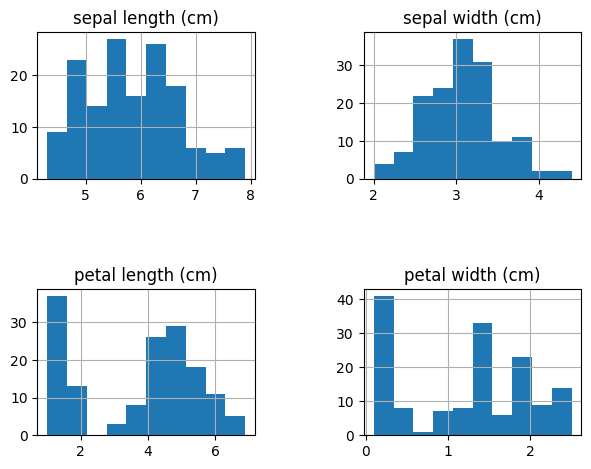

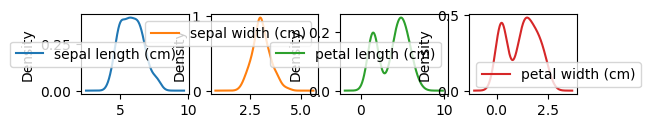

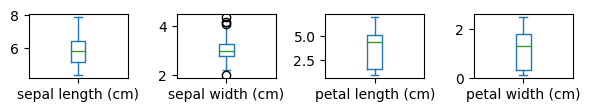

In [23]:
# EDA Visualization
# Make histogram for the given data set
iris_dataframe.hist()
pyplot.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.50)


# Make the density plots
iris_dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False)


# Make the box plots
iris_dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False)
pyplot.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.50)


In [19]:
%pip install seaborn

<ipython-input-22-d07a18a3000a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = iris_dataframe.corr()


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


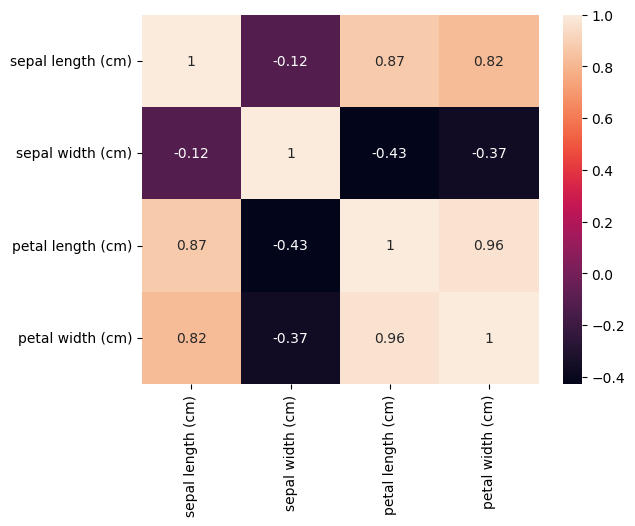

In [22]:
# Getting the covariance matrix
import seaborn as sn
from matplotlib import pyplot
correlations = iris_dataframe.corr()
# Print the matrix itself
print(correlations)
## plot correlation matrix
sn.heatmap(correlations,annot=True)


In [25]:
# printing the Pearson and Spearman correlation
from scipy.stats import spearmanr
from scipy.stats import pearsonr

a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print('Pearson r %0.3f | Spearman rho %0.3f'% (r_coef, rho_coef))

Pearson r -0.118 | Spearman rho -0.167


In [26]:
# running the chi-square test
from scipy.stats import chi2_contingency

table = pd.crosstab(iris_dataframe['group'], iris_binned['petal length (cm)'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 212.43 p-value 0.000


In [2]:
# transformation of data distribution

from scipy.stats import pearsonr

tranformations = {'x': lambda x: x,
                  '1/x': lambda x: 1/x,
                  'x**2': lambda x: x**2,
                  'x**3': lambda x: x**3,
                  'log(x)': lambda x: np.log(x)}

a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']

for transformation in tranformations:
    b_transformed =  tranformations[transformation](b)
    pearsonr_coef, pearsonr_p = pearsonr(a, b_transformed)
    print('Transformation: %s \t Pearson\'s r: %0.3f' % (transformation, pearsonr_coef))

<class 'NameError'>: name 'iris_dataframe' is not defined